<h1>DRV Analysis</h1>

In [1]:
from properties import vwl_hold, vbl_hold, vblneg_hold, vwl_read, vbl_read, vblneg_read
from properties import rit_models, l_ax_standard, w_ax_step_param_standard, save_w_ax_standard, l_pmos_q_standard, w_pmos_q_standard, l_nmos_q_standard, w_nmos_q_standard, l_pmos_q_neg_standard, w_pmos_q_neg_standard, l_nmos_q_neg_standard, w_nmos_q_neg_standard, dc_vsweep_standard, vdd_standard, vsweep_standard
from properties import snm_max, snm_min
from properties import l_ax_seevinck, w_ax_step_param_seevinck, save_w_ax_seevinck, l_pmos_q_seevinck, w_pmos_q_seevinck, l_nmos_q_seevinck, w_nmos_q_seevinck, l_pmos_q_neg_seevinck, w_pmos_q_neg_seevinck, l_nmos_q_neg_seevinck, w_nmos_q_neg_seevinck, dc_vsweep_seevinck, vdd_seevinck, vsweep_seevinck, e1_seevinck, e2_seevinck, e3_seevinck, e4_seevinck, e5_seevinck, e6_seevinck, e7_seevinck, e8_seevinck
from properties import rit_models_montecarlo, l_ax_gaussian_vth, w_ax_step_param_gaussian_vth, save_w_ax_gaussian_vth, l_pmos_q_gaussian_vth, w_pmos_q_gaussian_vth, l_nmos_q_gaussian_vth, w_nmos_q_gaussian_vth, l_pmos_q_neg_gaussian_vth, w_pmos_q_neg_gaussian_vth, l_nmos_q_neg_gaussian_vth, w_nmos_q_neg_gaussian_vth, dc_vsweep_gaussian_vth, vdd_gaussian_vth, vsweep_gaussian_vth, e1_gaussian_vth, e2_gaussian_vth, e3_gaussian_vth, e4_gaussian_vth, e5_gaussian_vth, e6_gaussian_vth, e7_gaussian_vth, e8_gaussian_vth, step_param_run_gaussian_vth, w_ax_gaussian_vth
from utils.path import ltspice, schematics, images, data
from utils.check import check_output_image
from utils.patterns import w_ax_standard_pattern, w_ax_seevinck_pattern, w_ax_gaussian_vth_pattern, snm_max_seevinck_pattern, snm_min_seevinck_pattern
from models.snm import standard_processing, rotate_points, seevinck_processing
import re
from models.ops import load_asc, load_ltr
from PyLTSpice import SimRunner
import matplotlib.pyplot as plt
import os
from math import sqrt
from statistics import mean, stdev

In [2]:
# w_ax pick
w_ax_pos = 1

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc


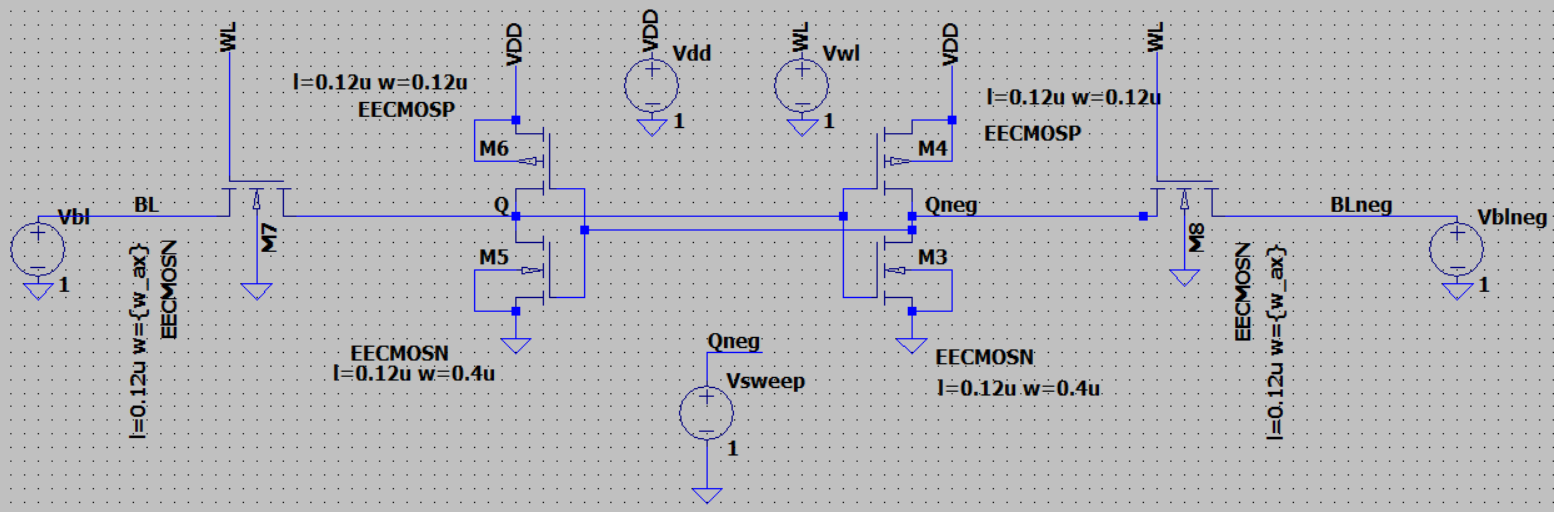

Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


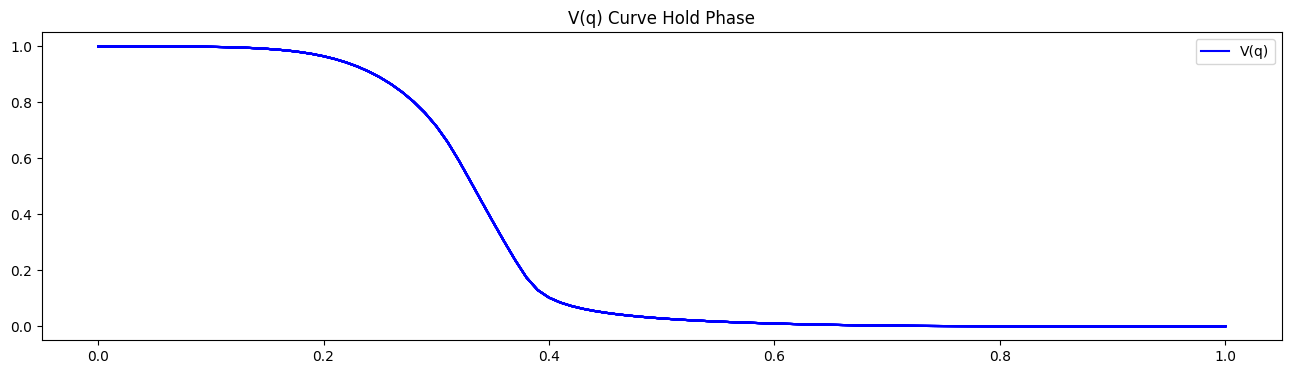

In [3]:
standard_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "standard.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
standard_hold_netlist.set_parameter('l_ax', l_ax_standard)
standard_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('vdd', vdd_standard)
standard_hold_netlist.set_parameter('vwl', vwl)
standard_hold_netlist.set_parameter('vbl', vbl)
standard_hold_netlist.set_parameter('vblneg', vblneg)
standard_hold_netlist.set_parameter('vsweep', vsweep_standard)
standard_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_hold_runner = SimRunner(output_folder=f"{data}/standard/hold/")
standard_hold_runner.run(netlist=standard_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_hold_runner.okSim) + '/' + str(standard_hold_runner.runno))

standard_hold_raw = ""
standard_hold_log = ""
for standard_hold_raw, standard_hold_log in standard_hold_runner:
    print("Raw file: %s, Log file: %s" % (standard_hold_raw, standard_hold_log))

standard_hold_ltr = load_ltr(raw_file_path=standard_hold_raw)
v_q_standard_hold = standard_hold_ltr.get_trace("V(q)")
vsweep_standard_hold = standard_hold_ltr.get_trace('vsweep')
steps = standard_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
standard_hold_simulation_path_image = os.path.join(images, "standard_hold_simulation.png")
check_output_image(standard_hold_simulation_path_image)
plt.savefig(standard_hold_simulation_path_image)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_hold.png


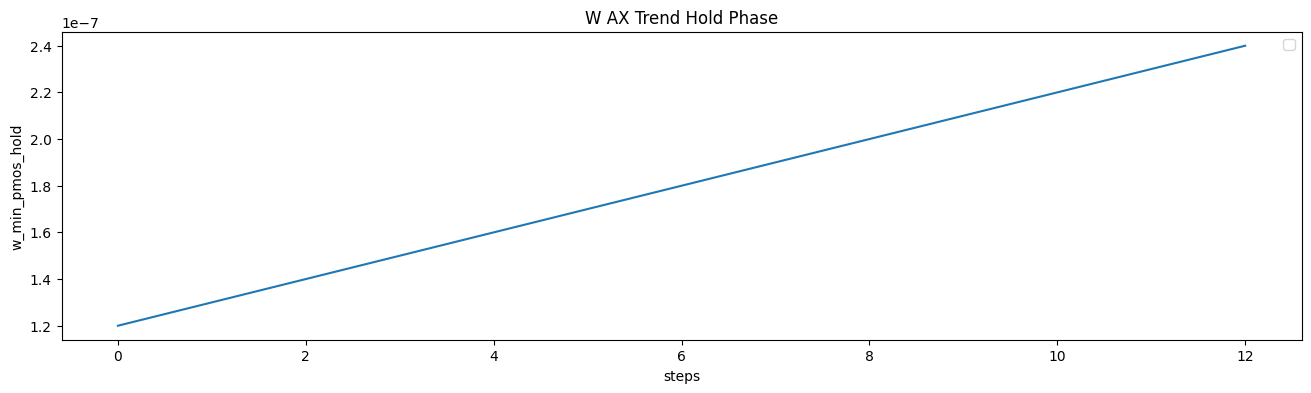

In [4]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_hold_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_hold_lines = w_ax_standard_hold_data.strip().split('\n')[1:]
w_ax_standard_hold = [float(line.split('\t')[1]) for line in w_ax_standard_hold_lines]

print(f'w_ax_standard_hold = {w_ax_standard_hold}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')
w_ax_standard_hold_path_image = os.path.join(images, "w_ax_standard_hold.png")
check_output_image(w_ax_standard_hold_path_image)
plt.savefig(w_ax_standard_hold_path_image)
plt.show()

snm_standard_hold = 262.43550473079256
File updated successfully: ../../images/butterfly_curve_standard_hold.png


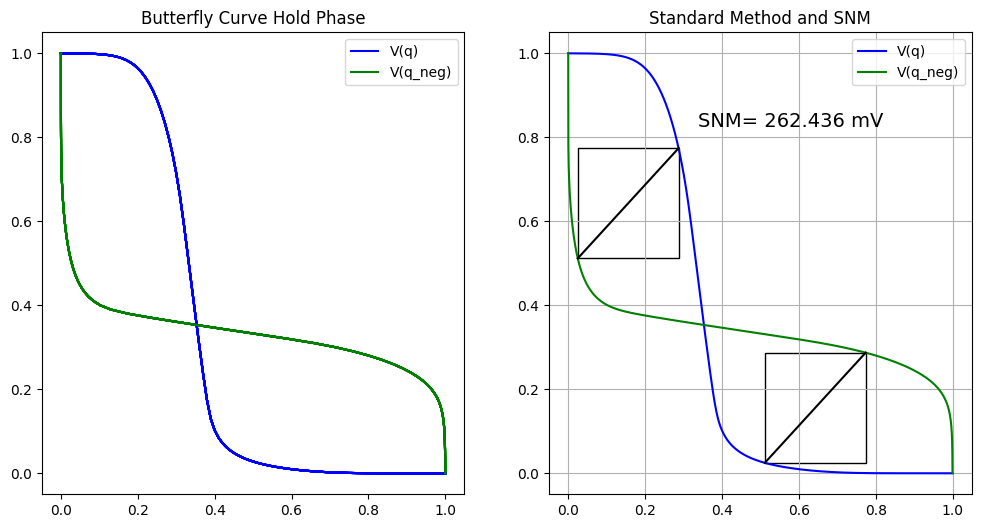

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_hold = []
vq_standard_hold = []
x_vqneg_standard_hold = []
vqneg_standard_hold = []
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    x_vq_standard_hold.append(x)
    vq_standard_hold.append(vq)
    x_vqneg_standard_hold.append(vq)
    vqneg_standard_hold.append(x)
    axs[0].plot(x, vq, label=steps[step], color='blue')
    axs[0].plot(vq, x, label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Hold Phase")
axs[0].legend(["V(q)", "V(q_neg)"])


snm_standard_hold = standard_processing(x_vq=x_vq_standard_hold[w_ax_pos], vq=vq_standard_hold[w_ax_pos], x_vqneg=x_vqneg_standard_hold[w_ax_pos], vqneg=vqneg_standard_hold[w_ax_pos], ax=axs[1])
print(f'snm_standard_hold = {snm_standard_hold}')

butterfly_curve_standard_hold_path_image = os.path.join(images, "butterfly_curve_standard_hold.png")
check_output_image(butterfly_curve_standard_hold_path_image)
plt.savefig(butterfly_curve_standard_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc


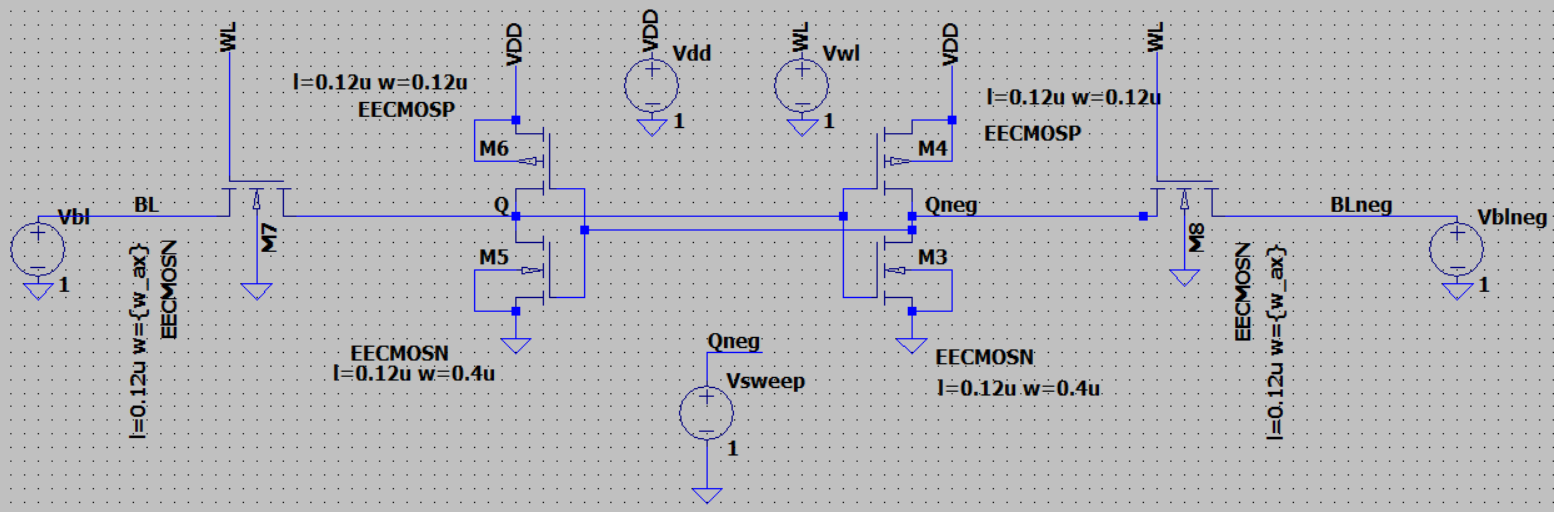

Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


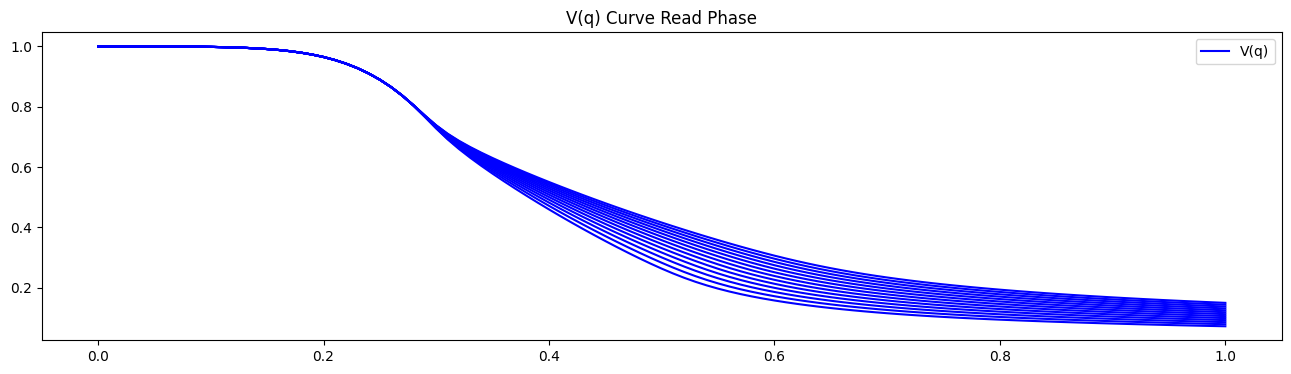

In [6]:
standard_read_netlist = load_asc(
                                     asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
                                     schematic_image_path=os.path.join(schematics, "standard.png")
                                     )
vwl=vwl_read; vbl=vbl_read; vblneg=vblneg_read
standard_read_netlist.set_parameter('l_ax', l_ax_standard)
standard_read_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_read_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_read_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_read_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_read_netlist.set_parameter('vdd', vdd_standard)
standard_read_netlist.set_parameter('vwl', vwl)
standard_read_netlist.set_parameter('vbl', vbl)
standard_read_netlist.set_parameter('vblneg', vblneg)
standard_read_netlist.set_parameter('vsweep', vsweep_standard)
standard_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_read_runner = SimRunner(output_folder=f"{data}/standard/read/")
standard_read_runner.run(netlist=standard_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_read_runner.okSim) + '/' + str(standard_read_runner.runno))

standard_read_raw = ""
standard_read_log = ""
for standard_read_raw, standard_read_log in standard_read_runner:
    print("Raw file: %s, Log file: %s" % (standard_read_raw, standard_read_log))

standard_read_ltr = load_ltr(raw_file_path=standard_read_raw)
v_q_standard_read = standard_read_ltr.get_trace("V(q)")
vsweep_standard_read = standard_read_ltr.get_trace('vsweep')
steps = standard_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
standard_read_simulation_path_image = os.path.join(images, "standard_read_simulation.png")
check_output_image(standard_read_simulation_path_image)
plt.savefig(standard_read_simulation_path_image)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_read.png


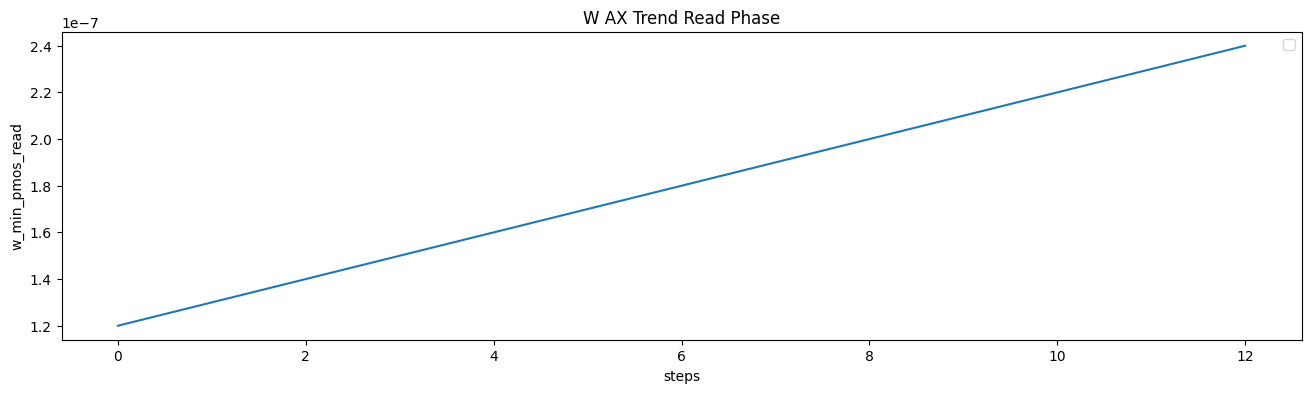

In [7]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_read_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_read_lines = w_ax_standard_read_data.strip().split('\n')[1:]
w_ax_standard_read = [float(line.split('\t')[1]) for line in w_ax_standard_read_lines]

print(f'w_ax_standard_read = {w_ax_standard_read}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')
w_ax_standard_read_path_image = os.path.join(images, "w_ax_standard_read.png")
check_output_image(w_ax_standard_read_path_image)
plt.savefig(w_ax_standard_read_path_image)
plt.show()

snm_standard_read = 141.84301463106343
File updated successfully: ../../images/butterfly_curve_standard_read.png


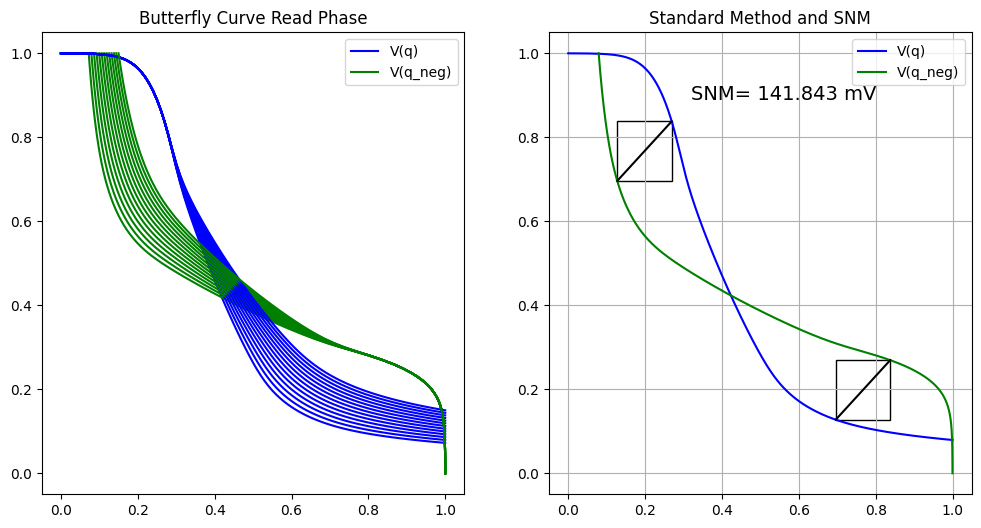

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_read = []
vq_standard_read = []
x_vqneg_standard_read = []
vqneg_standard_read = []
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    x_vq_standard_read.append(x)
    vq_standard_read.append(vq)
    x_vqneg_standard_read.append(vq)
    vqneg_standard_read.append(x)
    axs[0].plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    axs[0].plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Read Phase")
axs[0].legend(["V(q)", "V(q_neg)"])

snm_standard_read = standard_processing(x_vq=x_vq_standard_read[w_ax_pos], vq=vq_standard_read[w_ax_pos], x_vqneg=x_vqneg_standard_read[w_ax_pos], vqneg=vqneg_standard_read[w_ax_pos], ax=axs[1])
print(f'snm_standard_read = {snm_standard_read}')

butterfly_curve_standard_read_path_image = os.path.join(images, "butterfly_curve_standard_read.png")
check_output_image(butterfly_curve_standard_read_path_image)
plt.savefig(butterfly_curve_standard_read_path_image)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc


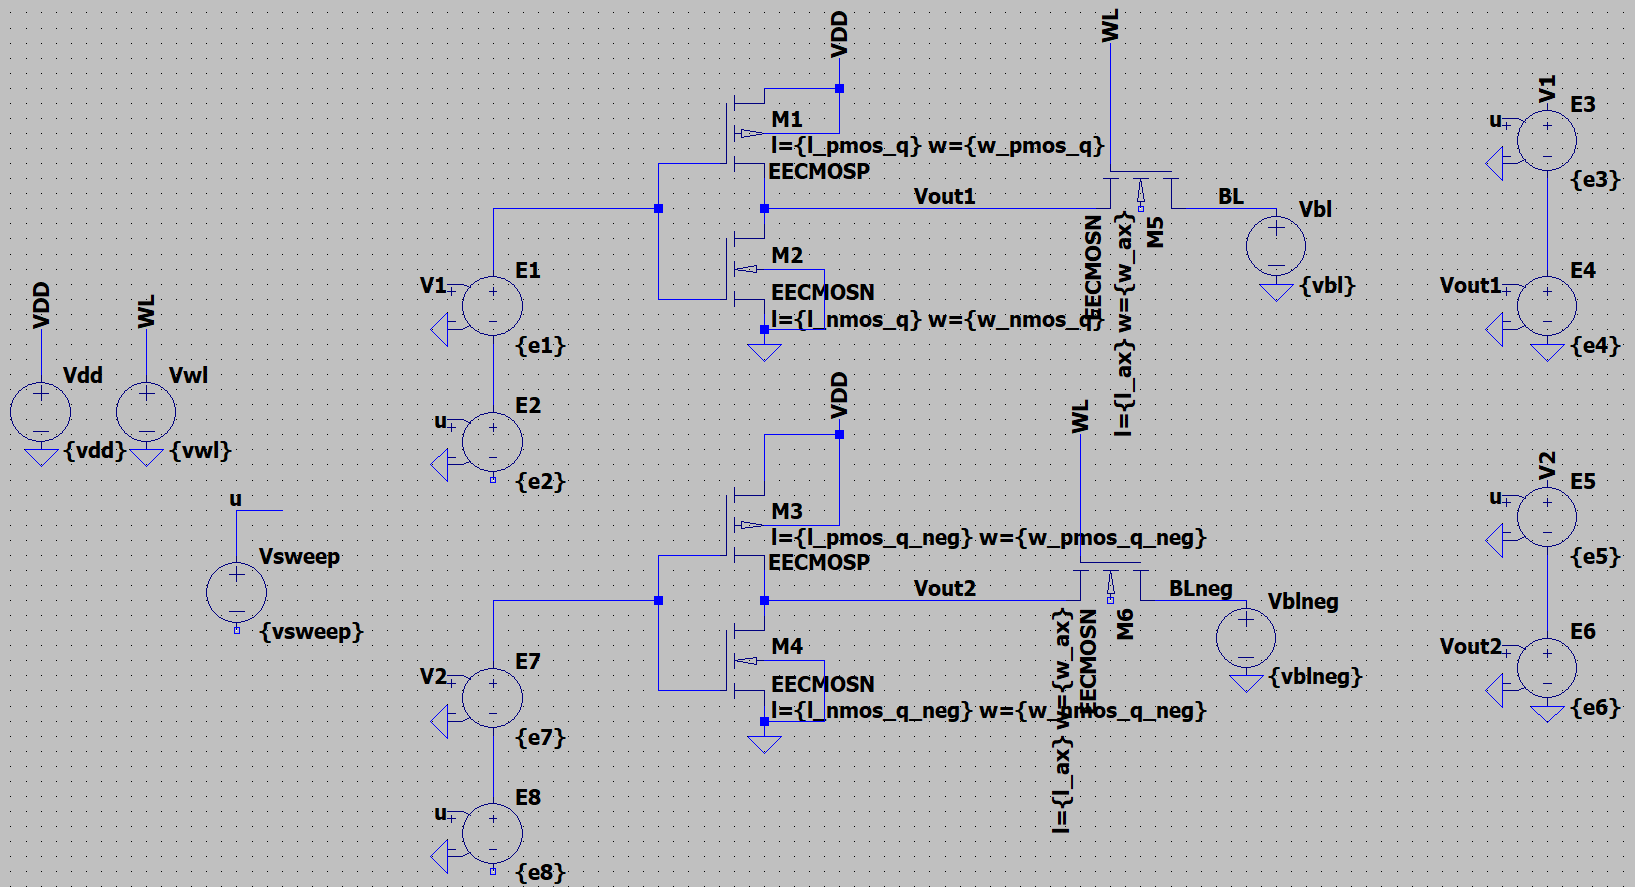

Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


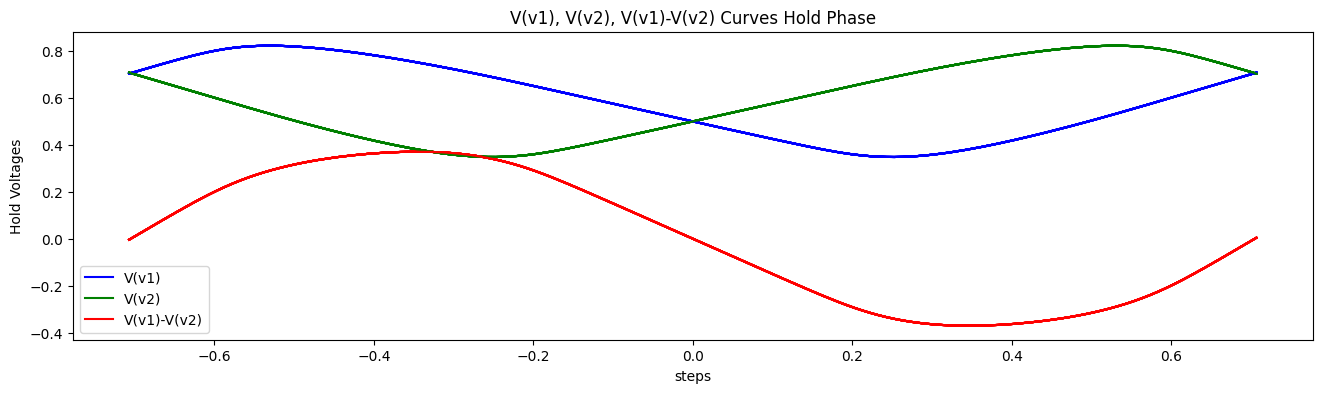

w_ax                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
1.2e-07 u                      261.875 mV                     -261.859 mV                   
1.3e-07 u                      261.875 mV                     -261.859 mV                   
1.4e-07 u                      261.875 mV                     -261.859 mV                   
1.5e-07 u                      261.875 mV                     -261.859 mV                   
1.6e-07 u                      261.875 mV                     -261.859 mV                   
1.7e-07 u                      261.875 mV                     -261.859 mV                   
1.8e-07 u                      261.875 mV                     -261.859 mV                   
1.9e-07 u                      261.875 mV                     -261.858 mV                   
2e-07 u                        261.875 mV                     -261.858 mV                   
2.1e-07 u                      261.874 mV                     -261.858

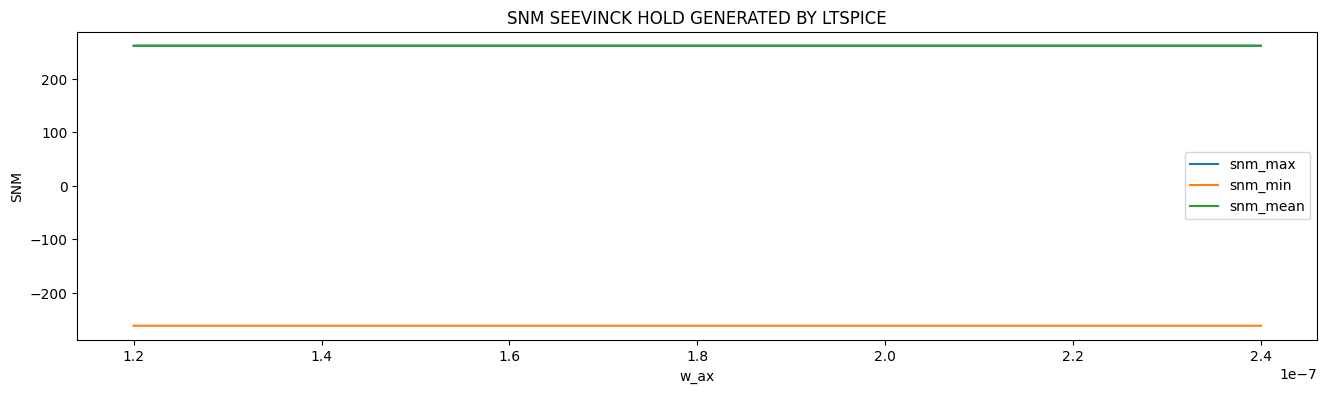

File updated successfully: ../../images/seevinck_hold_snm_ltspice.png


<Figure size 640x480 with 0 Axes>

In [9]:
seevinck_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
seevinck_hold_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_hold_netlist.set_parameter('vwl', vwl)
seevinck_hold_netlist.set_parameter('vbl', vbl)
seevinck_hold_netlist.set_parameter('vblneg', vblneg)
seevinck_hold_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_hold_netlist.set_parameter('e1', e1_seevinck)
seevinck_hold_netlist.set_parameter('e2', e2_seevinck)
seevinck_hold_netlist.set_parameter('e3', e3_seevinck)
seevinck_hold_netlist.set_parameter('e4', e4_seevinck)
seevinck_hold_netlist.set_parameter('e5', e5_seevinck)
seevinck_hold_netlist.set_parameter('e6', e6_seevinck)
seevinck_hold_netlist.set_parameter('e7', e7_seevinck)
seevinck_hold_netlist.set_parameter('e8', e8_seevinck)
seevinck_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        snm_max,
                                        snm_min,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_hold_runner = SimRunner(output_folder=f"{data}/seevinck/hold/")
seevinck_hold_runner.run(netlist=seevinck_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_hold_runner.okSim) + '/' + str(seevinck_hold_runner.runno))

seevinck_hold_raw = ""
seevinck_hold_log = ""
for seevinck_hold_raw, seevinck_hold_log in seevinck_hold_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_hold_raw, seevinck_hold_log))

seevinck_hold_ltr = load_ltr(raw_file_path=seevinck_hold_raw)
v_1_seevinck_hold = seevinck_hold_ltr.get_trace("V(v1)")
v_2_seevinck_hold = seevinck_hold_ltr.get_trace("V(v2)")
vsweep_seevinck_hold = seevinck_hold_ltr.get_trace('vsweep')
steps = seevinck_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
vq_seevinck_hold = []
vqneg_seevinck_hold = []
vq_vqneg_seevinck_hold = []
x_seevinck_hold = []
for step in range(len(steps)):
    vq = v_1_seevinck_hold.get_wave(step)
    vqneg = v_2_seevinck_hold.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_hold.append(vq)
    vqneg_seevinck_hold.append(vqneg)
    vq_vqneg_seevinck_hold.append(vq_minus_vqneg)
    x = vsweep_seevinck_hold.get_wave(step)
    x_seevinck_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
seevinck_hold_simulation_path_image = os.path.join(images, "seevinck_hold_simulation.png")
check_output_image(seevinck_hold_simulation_path_image)
plt.savefig(seevinck_hold_simulation_path_image)
plt.show()


seevinck_hold_log_file_path = f"./{seevinck_hold_log}"
with open(seevinck_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_hold_data = re.search(w_ax_seevinck_pattern, content, re.DOTALL).group(1)
w_ax_seevinck_hold_lines = w_ax_seevinck_hold_data.strip().split('\n')[1:]
w_ax_seevinck_hold = [float(line.split('\t')[1]) for line in w_ax_seevinck_hold_lines]

snm_max_seevinck_hold_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_seevinck_hold_lines = snm_max_seevinck_hold_data.strip().split('\n')[1:]
snm_max_seevinck_hold = [float(line.split('\t')[1]) * 1000 for line in snm_max_seevinck_hold_lines]
# snm_max_seevinck_hold = [1000 * snm_max for snm_max in snm_max_seevinck_hold]

snm_min_seevinck_hold_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_seevinck_hold_lines = snm_min_seevinck_hold_data.strip().split('\n')[1:]
snm_min_seevinck_hold = [float(line.split('\t')[1]) * 1000 for line in snm_min_seevinck_hold_lines]
# snm_min_seevinck_hold = [1000 * snm_min for snm_min in snm_min_seevinck_hold]

print("{:<30} {:<30} {:<30}".format("w_ax", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
snm_mean_seevinck_hold = []
for w, smax, smin in zip(w_ax_seevinck_hold, snm_max_seevinck_hold, snm_min_seevinck_hold):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_hold.append(smean)
print(f'snm_mean_seevinck_hold = {mean(snm_mean_seevinck_hold)}')
print(f'snm_seevinck_hold[{w_ax_seevinck_hold[w_ax_pos]} u] = {snm_max_seevinck_hold[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_hold, snm_max_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_min_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_mean_seevinck_hold)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK HOLD GENERATED BY LTSPICE")
plt.show()
seevinck_hold_snm_ltspice_path_image = os.path.join(images, "seevinck_hold_snm_ltspice.png")
check_output_image(seevinck_hold_snm_ltspice_path_image)
plt.savefig(seevinck_hold_snm_ltspice_path_image)
plt.show()

snm_seevinck_hold_seevinck_processing = 261.9149308688862
snm_seevinck_hold_standard_processing = 261.9878941702367
File updated successfully: ../../images/v1_minus_v2_seevinck_hold.png


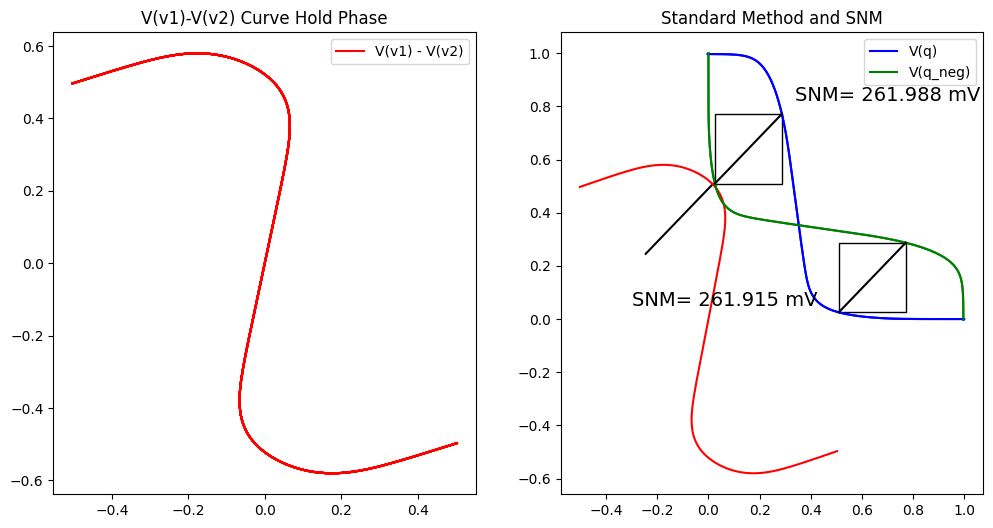

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_seevinck_hold[w_ax_pos], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x_seevinck_hold[w_ax_pos], vq_seevinck_hold[w_ax_pos], -45)
xshold2, yshold2 = rotate_points(x_seevinck_hold[w_ax_pos], vqneg_seevinck_hold[w_ax_pos], -45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_hold_seevinck_processing, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_seevinck_hold[w_ax_pos], v1_minus_v2=vq_vqneg_seevinck_hold[w_ax_pos], ax=axs[1])
snm_seevinck_hold_seevinck_processing = (1/sqrt(2)) * snm_seevinck_hold_seevinck_processing
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_seevinck_hold_seevinck_processing, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
print(f'snm_seevinck_hold_seevinck_processing = {snm_seevinck_hold_seevinck_processing}')

# standard processing
snm_seevinck_hold_standard_processing = standard_processing(x_vq=xshold1, vq=yshold1, x_vqneg=xshold2, vqneg=yshold2, ax=axs[1])
print(f'snm_seevinck_hold_standard_processing = {snm_seevinck_hold_standard_processing}')

v1_minus_v2_seevinck_hold_path_image = os.path.join(images, "v1_minus_v2_seevinck_hold.png")
check_output_image(v1_minus_v2_seevinck_hold_path_image)
plt.savefig(v1_minus_v2_seevinck_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc


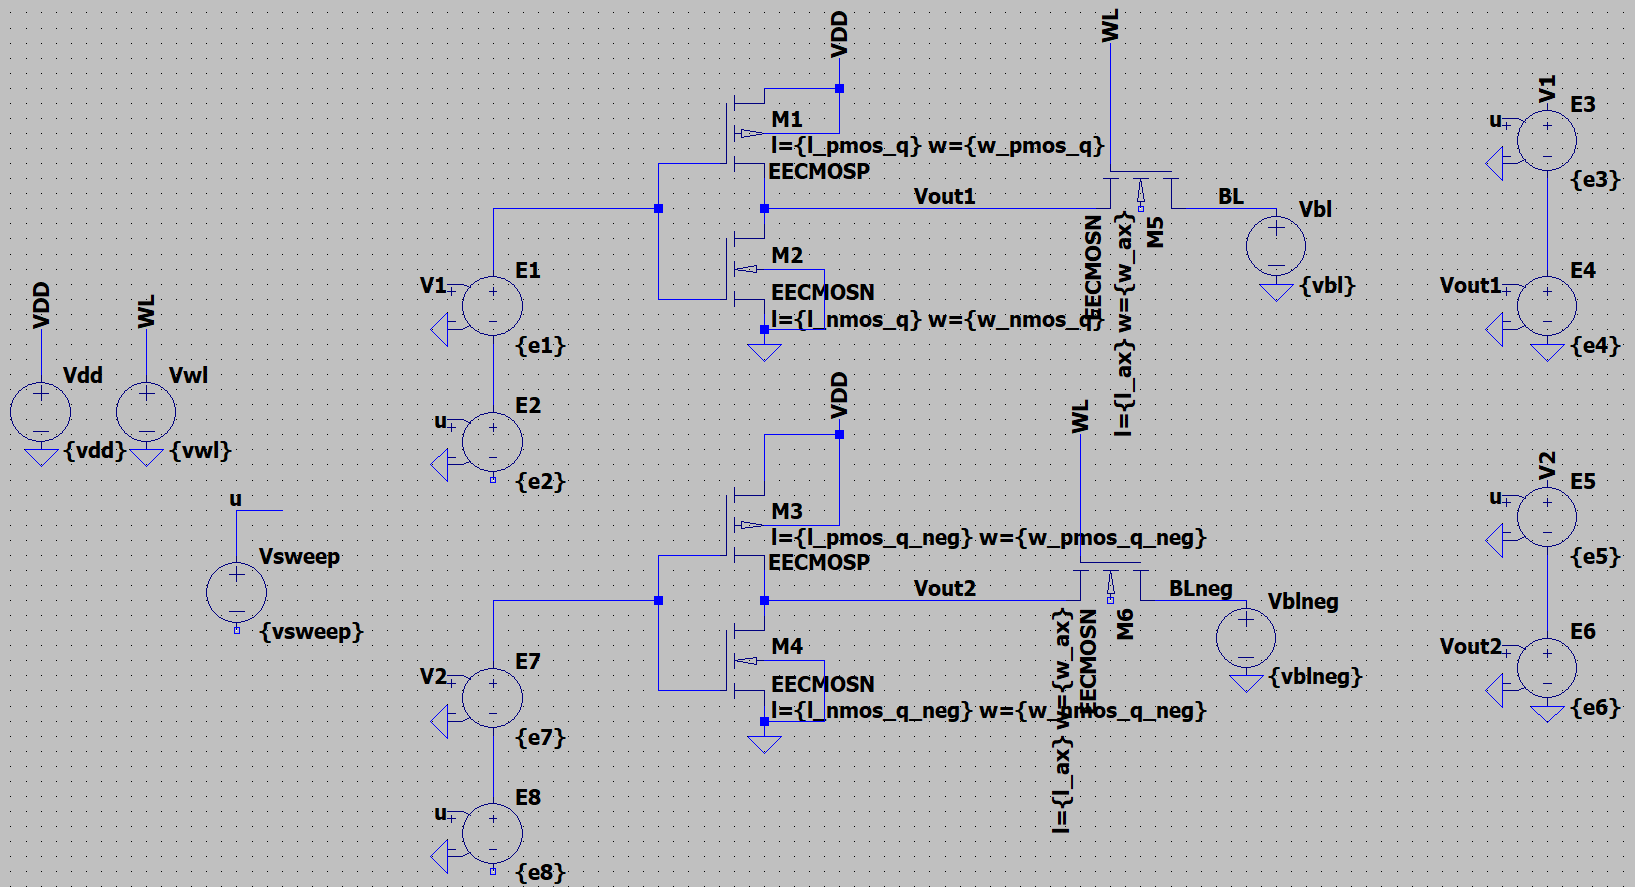

Successful/Total Simulations: 0/1
Raw file: data\seevinck\read\seevinck_read_1.raw, Log file: data\seevinck\read\seevinck_read_1.log
File opened successfully: data\seevinck\read\seevinck_read_1.raw
File updated successfully: ../../images/seevinck_read_simulation.png


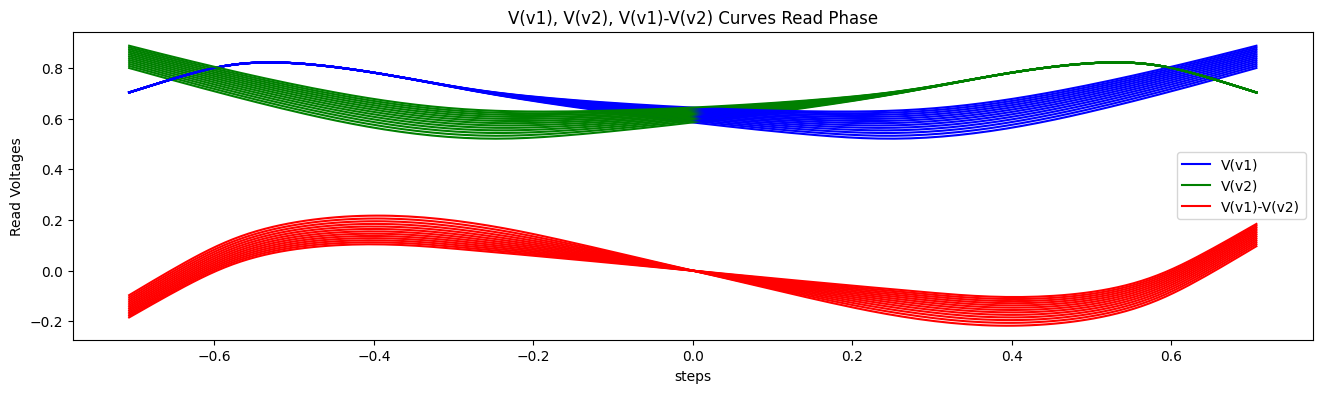

w_ax                 SNM_MAX(READ)                  SNM_MIN(READ)                 
1.2e-07 u            153.49699999999999 mV          -153.499 mV                   
1.3e-07 u            145.509 mV                     -145.491 mV                   
1.4e-07 u            137.816 mV                     -137.78199999999998 mV        
1.5e-07 u            130.39600000000002 mV          -130.373 mV                   
1.6e-07 u            123.232 mV                     -123.226 mV                   
1.7e-07 u            116.30699999999999 mV          -116.31700000000001 mV        
1.8e-07 u            109.608 mV                     -109.63000000000001 mV        
1.9e-07 u            106.27000000000001 mV          -106.27000000000001 mV        
2e-07 u              111.278 mV                     -111.278 mV                   
2.1e-07 u            116.19 mV                      -116.19 mV                    
2.2e-07 u            121.009 mV                     -121.009 mV                   
2.3e

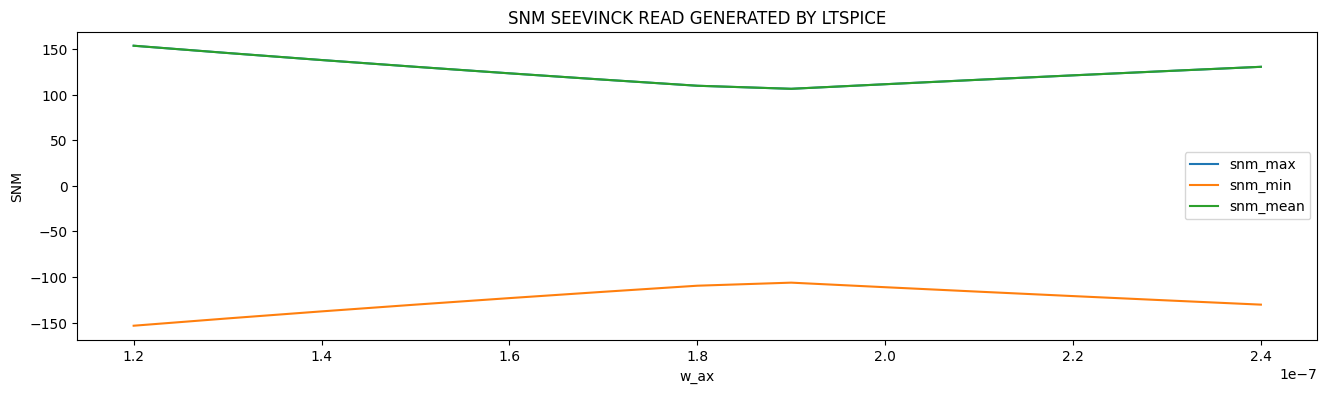

File updated successfully: ../../images/seevinck_read_snm_ltspice.png


<Figure size 640x480 with 0 Axes>

In [11]:
seevinck_read_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl='1'; vbl='1'; vblneg='1'
seevinck_read_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_read_netlist.set_parameter('vwl', vwl)
seevinck_read_netlist.set_parameter('vbl', vbl)
seevinck_read_netlist.set_parameter('vblneg', vblneg)
seevinck_read_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_read_netlist.set_parameter('e1', e1_seevinck)
seevinck_read_netlist.set_parameter('e2', e2_seevinck)
seevinck_read_netlist.set_parameter('e3', e3_seevinck)
seevinck_read_netlist.set_parameter('e4', e4_seevinck)
seevinck_read_netlist.set_parameter('e5', e5_seevinck)
seevinck_read_netlist.set_parameter('e6', e6_seevinck)
seevinck_read_netlist.set_parameter('e7', e7_seevinck)
seevinck_read_netlist.set_parameter('e8', e8_seevinck)
seevinck_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        snm_max,
                                        snm_min,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_read_runner = SimRunner(output_folder=f"{data}/seevinck/read/")
seevinck_read_runner.run(netlist=seevinck_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_read_runner.okSim) + '/' + str(seevinck_read_runner.runno))

seevinck_read_raw = ""
seevinck_read_log = ""
for seevinck_read_raw, seevinck_read_log in seevinck_read_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_read_raw, seevinck_read_log))

seevinck_read_ltr = load_ltr(raw_file_path=seevinck_read_raw)
v_1_seevinck_read = seevinck_read_ltr.get_trace("V(v1)")
v_2_seevinck_read = seevinck_read_ltr.get_trace("V(v2)")
vsweep_seevinck_read = seevinck_read_ltr.get_trace('vsweep')
steps = seevinck_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
vq_seevinck_read = []
vqneg_seevinck_read = []
vq_vqneg_seevinck_read = []
x_seevinck_read = []
for step in range(len(steps)):
    vq = v_1_seevinck_read.get_wave(step)
    vqneg = v_2_seevinck_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_read.append(vq)
    vqneg_seevinck_read.append(vqneg)
    vq_vqneg_seevinck_read.append(vq_minus_vqneg)
    x = vsweep_seevinck_read.get_wave(step)
    x_seevinck_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
seevinck_read_simulation_path_image = os.path.join(images, "seevinck_read_simulation.png")
check_output_image(seevinck_read_simulation_path_image)
plt.savefig(seevinck_read_simulation_path_image)
plt.show()


seevinck_read_log_file_path = f"./{seevinck_read_log}"
with open(seevinck_read_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_read_data = re.search(w_ax_seevinck_pattern, content, re.DOTALL).group(1)
w_ax_seevinck_read_lines = w_ax_seevinck_read_data.strip().split('\n')[1:]
w_ax_seevinck_read = [float(line.split('\t')[1]) for line in w_ax_seevinck_read_lines]

snm_max_seevinck_read_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_seevinck_read_lines = snm_max_seevinck_read_data.strip().split('\n')[1:]
snm_max_seevinck_read = [float(line.split('\t')[1]) * 1000 for line in snm_max_seevinck_read_lines]
# snm_max_seevinck_read = [1000 * snm_max for snm_max in snm_max_seevinck_read]

snm_min_seevinck_read_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_seevinck_read_lines = snm_min_seevinck_read_data.strip().split('\n')[1:]
snm_min_seevinck_read = [float(line.split('\t')[1]) * 1000 for line in snm_min_seevinck_read_lines]
# snm_min_seevinck_read = [1000 * snm_min for snm_min in snm_min_seevinck_read]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_seevinck_read = []
for w, smax, smin in zip(w_ax_seevinck_read, snm_max_seevinck_read, snm_min_seevinck_read):
    smean = (smax + abs(smin)) / 2
    print("{:<20} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_read.append(smean)
print(f'snm_mean_seevinck_read = {mean(snm_mean_seevinck_read)}')
print(f'snm_seevinck_read[{w_ax_seevinck_read[w_ax_pos]} u] = {snm_max_seevinck_read[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_read, snm_max_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_min_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_mean_seevinck_read)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK READ GENERATED BY LTSPICE")
plt.show()
seevinck_read_snm_ltspice_path_image = os.path.join(images, "seevinck_read_snm_ltspice.png")
check_output_image(seevinck_read_snm_ltspice_path_image)
plt.savefig(seevinck_read_snm_ltspice_path_image)
plt.show()

snm_seevinck_read_seevinck_processing = 145.53129774047963
snm_seevinck_read_standard_processing = 145.6016039856352
File updated successfully: ../../images/v1_minus_v2_seevinck_read.png


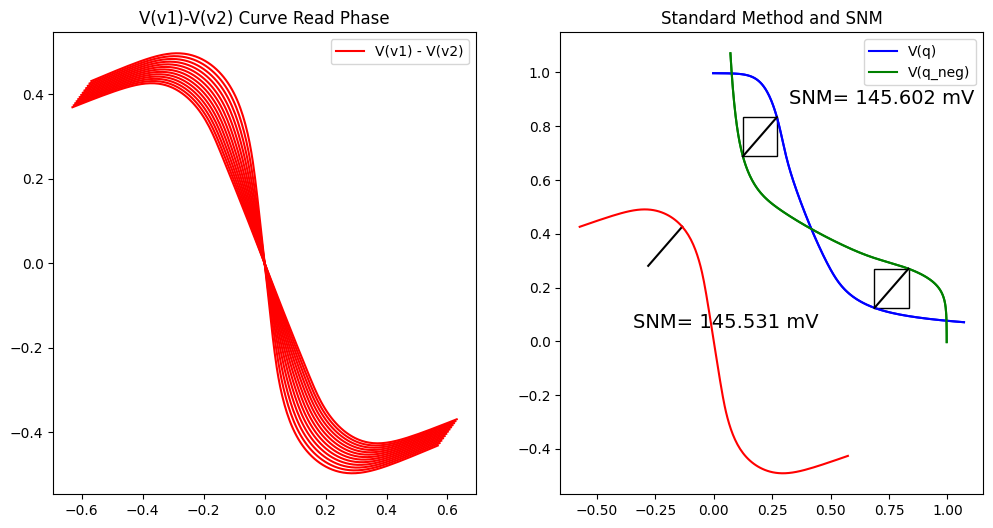

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x_seevinck_read[w_ax_pos], vq_vqneg_array, -45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x_seevinck_read[w_ax_pos], vq_seevinck_read[w_ax_pos], -45)
xshold2, yshold2 = rotate_points(x_seevinck_read[w_ax_pos], vqneg_seevinck_read[w_ax_pos], -45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_read_seevinck_processing, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_seevinck_read[w_ax_pos], v1_minus_v2=vq_vqneg_seevinck_read[w_ax_pos], ax=axs[1])
snm_seevinck_read_seevinck_processing = (1/sqrt(2)) * snm_seevinck_read_seevinck_processing
axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_seevinck_read_seevinck_processing, fontsize=14)
axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
print(f'snm_seevinck_read_seevinck_processing = {snm_seevinck_read_seevinck_processing}')

# standard processing
snm_seevinck_read_standard_processing = standard_processing(x_vq=xshold1, vq=yshold1, x_vqneg=xshold2, vqneg=yshold2, ax=axs[1])
print(f'snm_seevinck_read_standard_processing = {snm_seevinck_read_standard_processing}')

v1_minus_v2_seevinck_read_path_image = os.path.join(images, "v1_minus_v2_seevinck_read.png")
check_output_image(v1_minus_v2_seevinck_read_path_image)
plt.savefig(v1_minus_v2_seevinck_read_path_image)
plt.show()

<h2>Gaussian VTH Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc


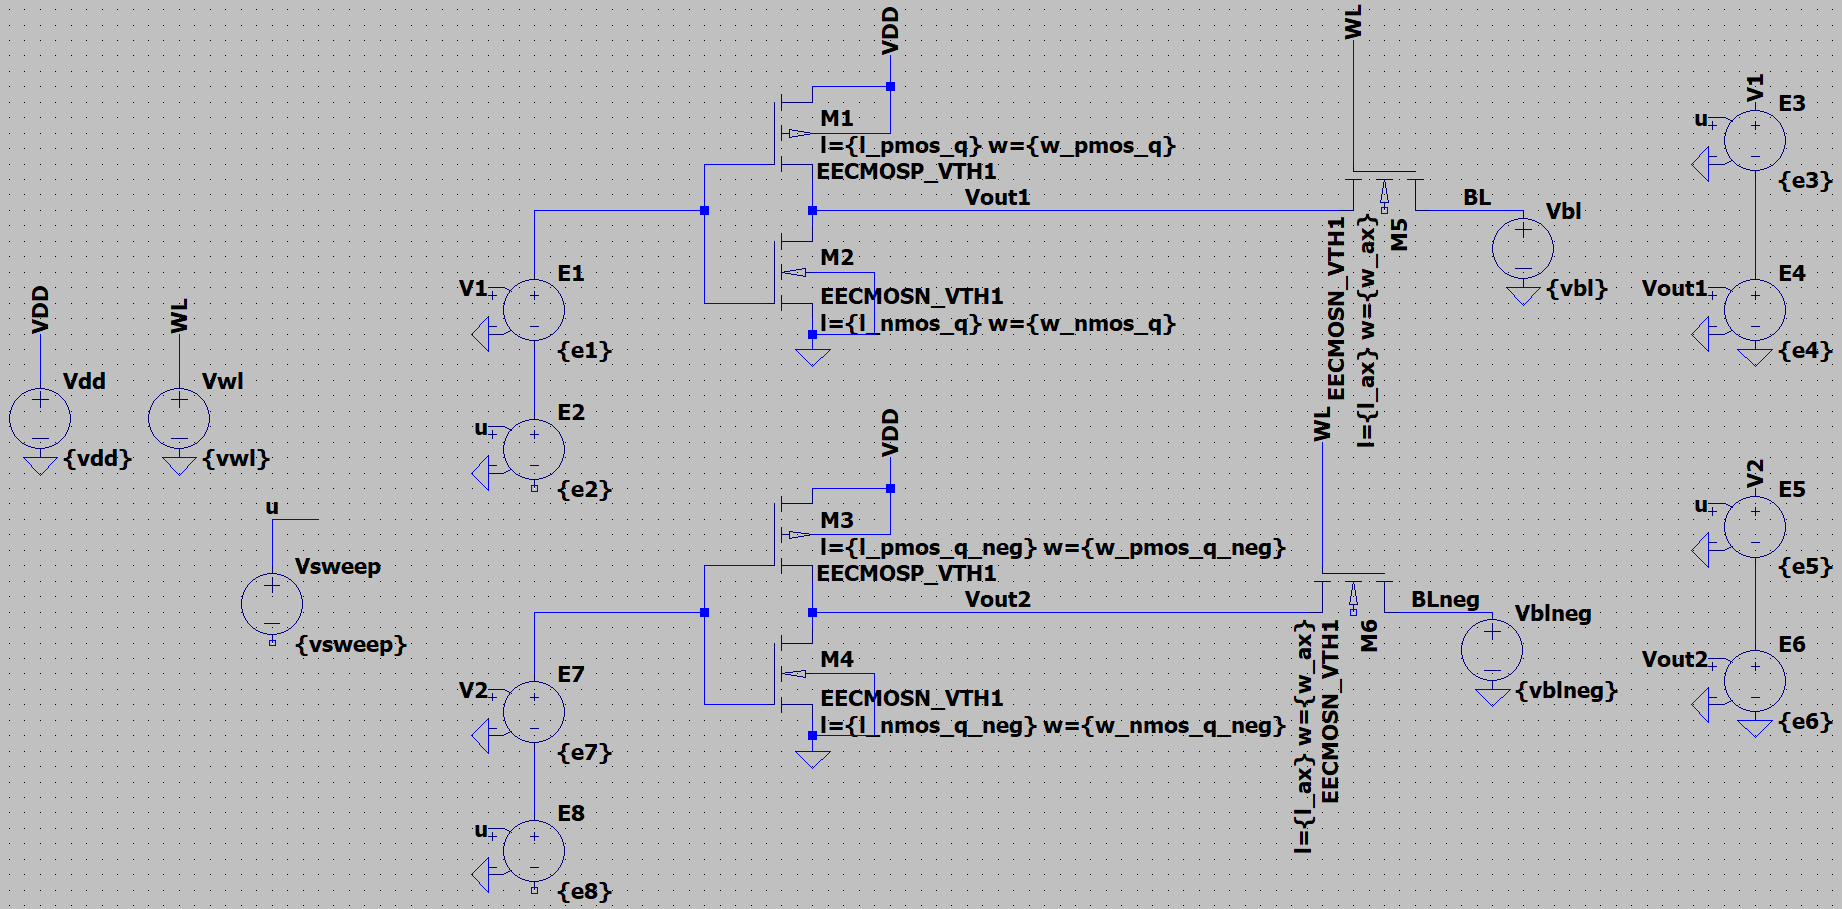

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
File updated successfully: ../../images/gaussian_vth_hold_simulation.png


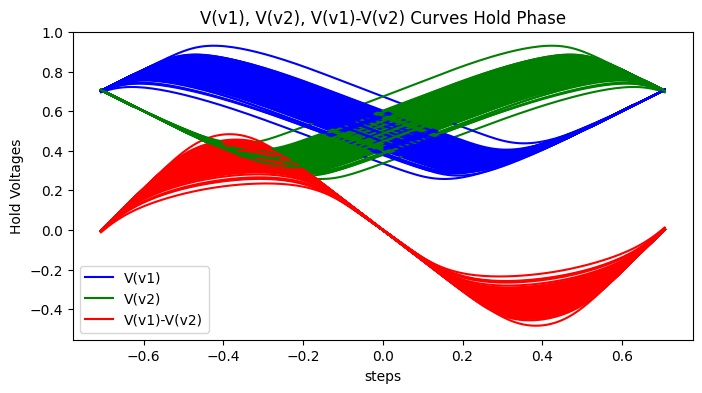

V_TH                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
<class 'ValueError'> u         243.042 mV                     -243.037 mV                   
<class 'ValueError'> u         275.92100000000005 mV          -275.92 mV                    
<class 'ValueError'> u         263.92199999999997 mV          -263.94800000000004 mV        
<class 'ValueError'> u         255.892 mV                     -255.905 mV                   
<class 'ValueError'> u         322.741 mV                     -322.66299999999995 mV        
<class 'ValueError'> u         273.245 mV                     -273.254 mV                   
<class 'ValueError'> u         265.31300000000005 mV          -265.30199999999996 mV        
<class 'ValueError'> u         211.347 mV                     -211.37 mV                    
<class 'ValueError'> u         232.078 mV                     -232.11100000000002 mV        
<class 'ValueError'> u         252.986 mV                     -253.000

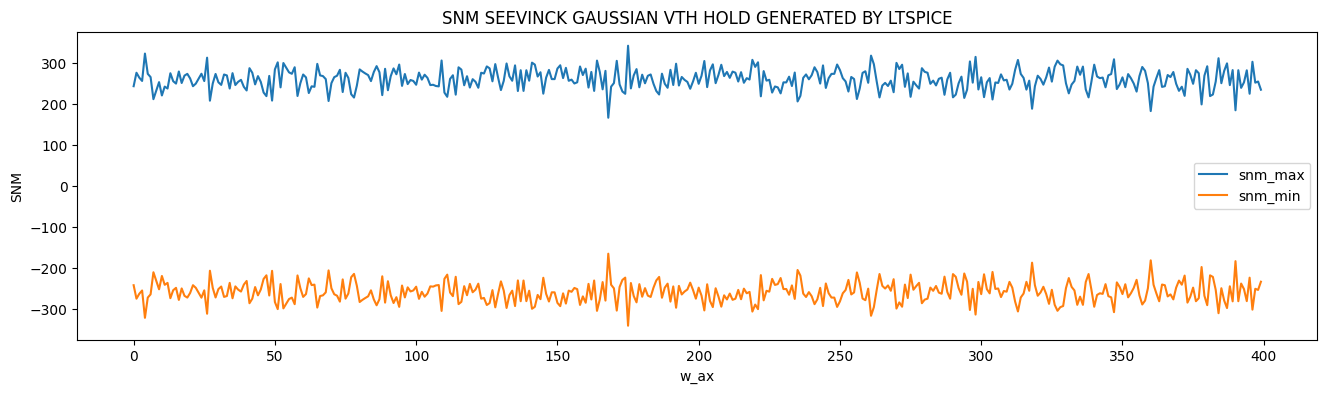

File updated successfully: ../../images/gaussian_vth_hold_snm_ltspice.png


<Figure size 640x480 with 0 Axes>

In [13]:
gaussian_vth_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
                                )
vwl=vwl_hold; vbl=vbl_hold; vblneg=vblneg_hold
gaussian_vth_hold_netlist.set_parameter('l_ax', l_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_ax', w_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vdd', vdd_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vwl', vwl)
gaussian_vth_hold_netlist.set_parameter('vbl', vbl)
gaussian_vth_hold_netlist.set_parameter('vblneg', vblneg)
gaussian_vth_hold_netlist.set_parameter('vsweep', vsweep_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e1', e1_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e2', e2_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e3', e3_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e4', e4_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e5', e5_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e6', e6_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e7', e7_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e8', e8_gaussian_vth)
gaussian_vth_hold_netlist.add_instructions(
                                        rit_models_montecarlo,
                                        dc_vsweep_gaussian_vth,
                                        step_param_run_gaussian_vth,
                                        snm_max,
                                        snm_min
                                    )
gaussian_vth_hold_runner = SimRunner(output_folder=f"{data}/gaussian-vth/hold/")
gaussian_vth_hold_runner.run(netlist=gaussian_vth_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(gaussian_vth_hold_runner.okSim) + '/' + str(gaussian_vth_hold_runner.runno))

gaussian_vth_hold_raw = ""
gaussian_vth_hold_log = ""
for gaussian_vth_hold_raw, gaussian_vth_hold_log in gaussian_vth_hold_runner:
    print("Raw file: %s, Log file: %s" % (gaussian_vth_hold_raw, gaussian_vth_hold_log))

gaussian_vth_hold_ltr = load_ltr(raw_file_path=gaussian_vth_hold_raw)
v_1_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v1)")
v_2_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v2)")
vsweep_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace('vsweep')
steps = gaussian_vth_hold_ltr.get_steps()

plt.figure(figsize=(8, 4))
vq_gaussian_vth_hold = []
vqneg_gaussian_vth_hold = []
vq_vqneg_gaussian_vth_hold = []
x_gaussian_vth_hold = []
for step in range(len(steps)):
    vq = v_1_gaussian_vth_hold.get_wave(step)
    vq_gaussian_vth_hold.append(vq)
    vqneg = v_2_gaussian_vth_hold.get_wave(step)
    vqneg_gaussian_vth_hold.append(vqneg)
    vq_minus_vqneg = vq - vqneg
    vq_vqneg_gaussian_vth_hold.append(vq_minus_vqneg)
    x = vsweep_gaussian_vth_hold.get_wave(step)
    x_gaussian_vth_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
gaussian_vth_hold_simulation_path_image = os.path.join(images, "gaussian_vth_hold_simulation.png")
check_output_image(gaussian_vth_hold_simulation_path_image)
plt.savefig(gaussian_vth_hold_simulation_path_image)
plt.show()


gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
with open(gaussian_vth_hold_log_file_path, "r") as file:
    content = file.read()

snm_max_gaussian_vth_hold_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_gaussian_vth_hold_lines = snm_max_gaussian_vth_hold_data.strip().split('\n')[1:]
snm_max_gaussian_vth_hold = [float(line.split('\t')[1]) * 1000 for line in snm_max_gaussian_vth_hold_lines]
# snm_max_gaussian_vth_hold = [1000 * snm_max for snm_max in snm_max_gaussian_vth_hold]

snm_min_gaussian_vth_hold_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_gaussian_vth_hold_lines = snm_min_gaussian_vth_hold_data.strip().split('\n')[1:]
snm_min_gaussian_vth_hold = [float(line.split('\t')[1]) * 1000 for line in snm_min_gaussian_vth_hold_lines]
# snm_min_gaussian_vth_hold = [1000 * snm_min for snm_in in snm_min_gaussian_vth_hold]

print("{:<30} {:<30} {:<30}".format("V_TH", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
snm_mean_gaussian_vth_hold = []
v_th_hold_gaussian_vth = []
for smax, smin in zip(snm_max_gaussian_vth_hold, snm_min_gaussian_vth_hold):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{ValueError} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_gaussian_vth_hold.append(smean)

plt.figure(figsize=(16, 4))
plt.plot(snm_max_gaussian_vth_hold)
plt.plot(snm_min_gaussian_vth_hold)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min"])
plt.title("SNM SEEVINCK GAUSSIAN VTH HOLD GENERATED BY LTSPICE")
plt.show()
gaussian_vth_hold_snm_ltspice_path_image = os.path.join(images, "gaussian_vth_hold_snm_ltspice.png")
check_output_image(gaussian_vth_hold_snm_ltspice_path_image)
plt.savefig(gaussian_vth_hold_snm_ltspice_path_image)
plt.show()

snm_mean_gaussian_vth_hold = 259.91638
snm_stdev_gaussian_vth_hold = 25.21061809848917
File updated successfully: ../../images/gaussian_vth_snm_hold.png


<Figure size 1600x400 with 0 Axes>

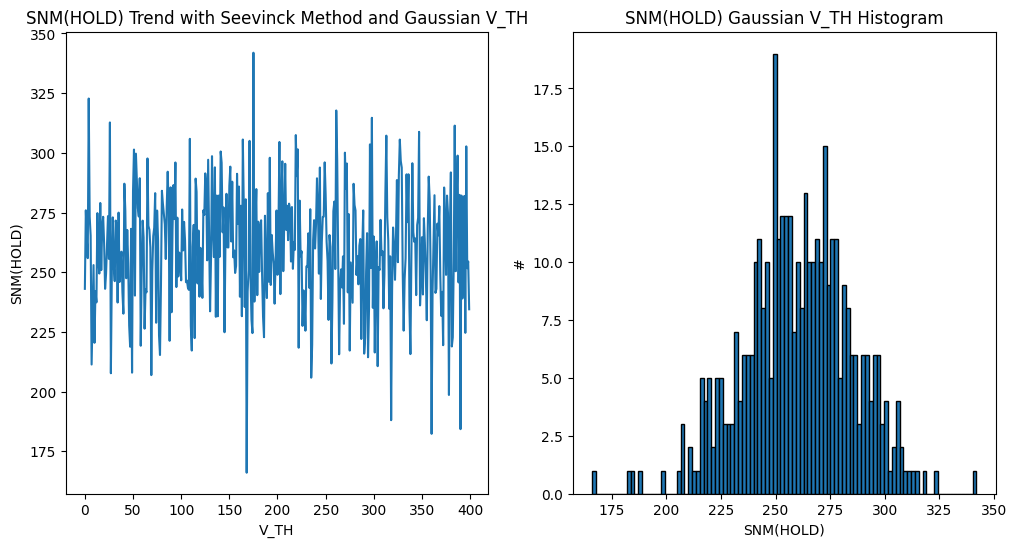

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(16, 4))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(snm_max_gaussian_vth_hold)  
# axs[0].plot(w_ax_hold_seevinck, snm_hold_seevinck)
axs[0].set_title("SNM(HOLD) Trend with Seevinck Method and Gaussian V_TH")
axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(HOLD)")
axs[1].hist(snm_max_gaussian_vth_hold, bins=100, edgecolor='black')
axs[1].set_xlabel("SNM(HOLD)"); axs[1].set_ylabel("#") 
axs[1].set_title("SNM(HOLD) Gaussian V_TH Histogram")
print(f'snm_mean_gaussian_vth_hold = {mean(snm_max_gaussian_vth_hold)}')
print(f'snm_stdev_gaussian_vth_hold = {stdev(snm_max_gaussian_vth_hold)}')

gaussian_vth_snm_hold_path_image = os.path.join(images, "gaussian_vth_snm_hold.png")
check_output_image(gaussian_vth_snm_hold_path_image)
plt.savefig(gaussian_vth_snm_hold_path_image)
plt.show()
plt.tight_layout()

In [15]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# 
# # vq-vqneg rotating
# for vq_array, vqneg_array in zip(vq_gaussian_vth_hold, vqneg_gaussian_vth_hold):
#     vq_vqneg_array = vq_array - vqneg_array
#     x_diff, y_diff = rotate_points(x_gaussian_vth_hold[w_ax_pos], vq_vqneg_array, -45)
#     axs[0].plot(x_diff, y_diff, color='red')
# axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
# axs[0].legend(["V(v1) - V(v2)"])
# 
# # vq and vqneg rotating
# xshold1, yshold1 = rotate_points(x_gaussian_vth_hold[w_ax_pos], vq_gaussian_vth_hold[w_ax_pos], -45)
# xshold2, yshold2 = rotate_points(x_gaussian_vth_hold[w_ax_pos], vqneg_gaussian_vth_hold[w_ax_pos], -45)
# axs[1].plot(xshold1, yshold1, color='blue')
# axs[1].plot(xshold2, yshold2, color='green')
# 
# # seevinck processing
# snm_gaussian_vth_hold_seevinck_processing, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_gaussian_vth_hold[w_ax_pos], v1_minus_v2=vq_vqneg_gaussian_vth_hold[w_ax_pos], ax=axs[1])
# snm_gaussian_vth_hold_seevinck_processing = (1/sqrt(2)) * snm_gaussian_vth_hold_seevinck_processing
# axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_gaussian_vth_hold_seevinck_processing, fontsize=14)
# axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
# print(f'snm_gaussian_vth_hold = {snm_gaussian_vth_hold_seevinck_processing}')
# 
# # standard processing
# snm_gaussian_vth_hold_standard_processing = standard_processing(x_vq=xshold1, vq=yshold1, x_vqneg=xshold2, vqneg=yshold2, ax=axs[1])
# print(f'snm_gaussian_vth_hold_standard_processing = {snm_gaussian_vth_hold_standard_processing}')
# 
# v1_minus_v2_gaussian_vth_hold_path_image = os.path.join(images, "v1_minus_v2_gaussian_vth_hold.png")
# check_output_image(v1_minus_v2_gaussian_vth_hold_path_image)
# plt.savefig(v1_minus_v2_gaussian_vth_hold_path_image)
# plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc


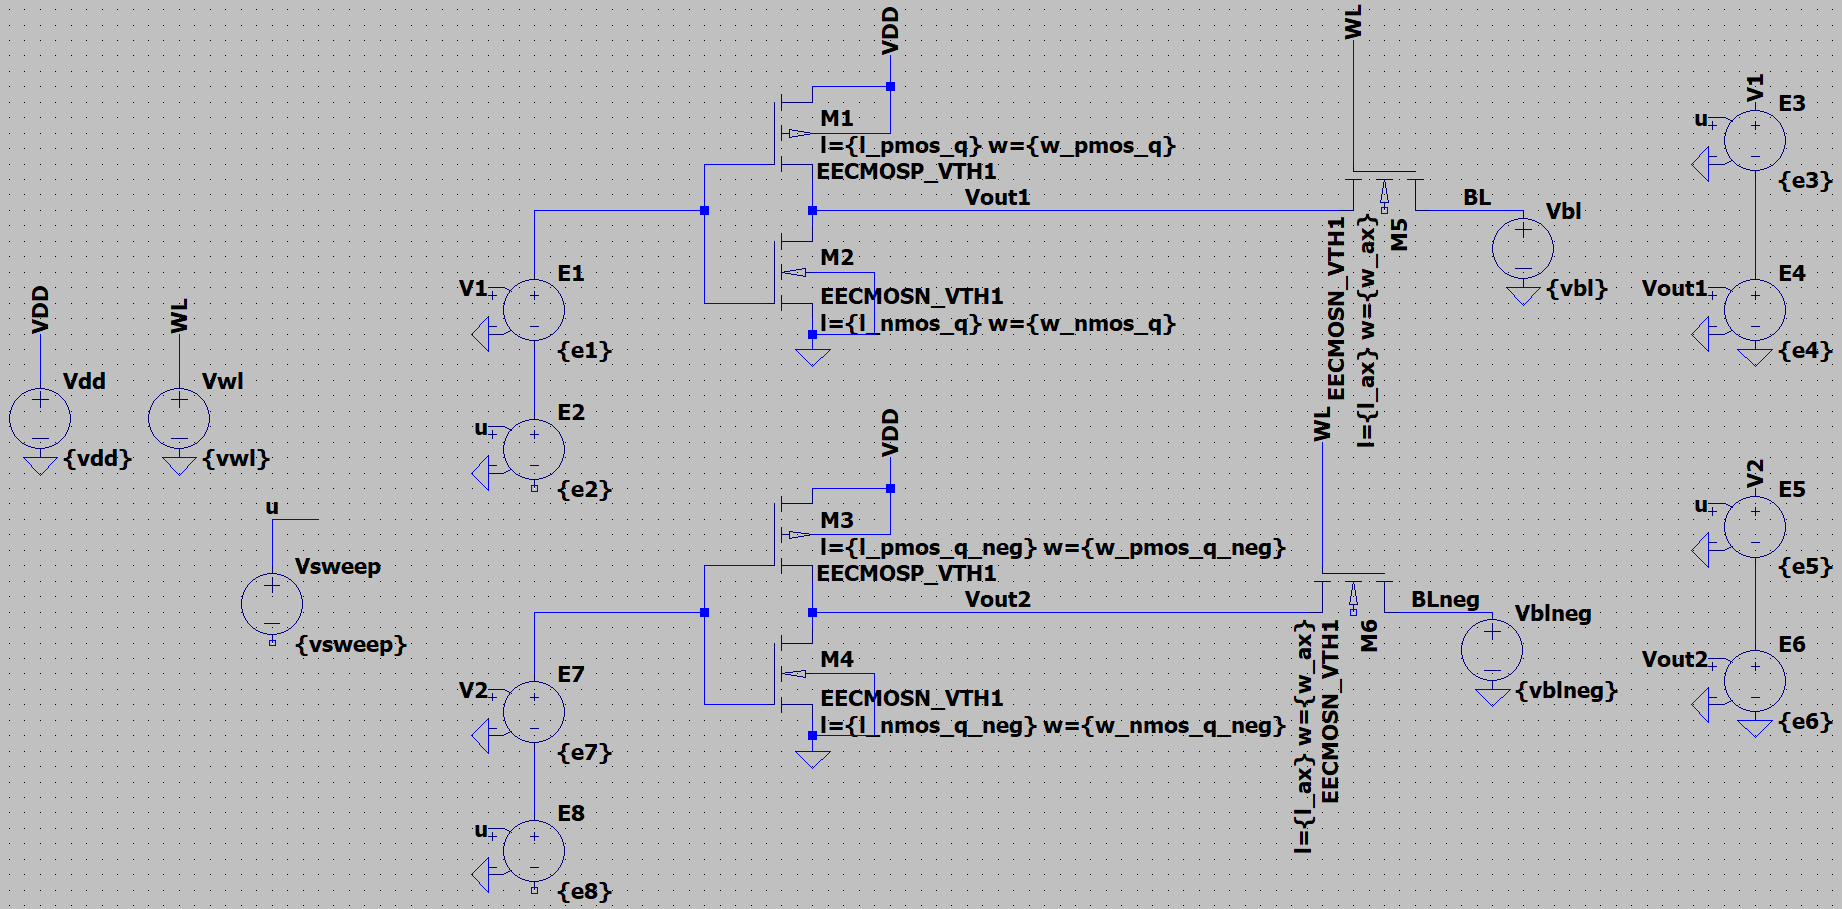

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
File updated successfully: ../../images/gaussian_vth_read_simulation.png


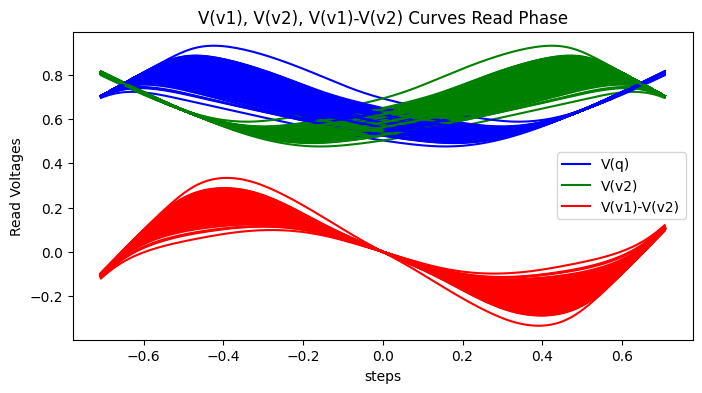

V_TH                           SNM_MAX(READ)                  SNM_MIN(READ)                 
<class 'ValueError'> u         119.31 mV                      -119.306 mV                   
<class 'ValueError'> u         157.64000000000001 mV          -157.59799999999998 mV        
<class 'ValueError'> u         141.936 mV                     -141.913 mV                   
<class 'ValueError'> u         140.071 mV                     -140.065 mV                   
<class 'ValueError'> u         203.557 mV                     -203.5 mV                     
<class 'ValueError'> u         160.209 mV                     -160.18099999999998 mV        
<class 'ValueError'> u         150.782 mV                     -150.76 mV                    
<class 'ValueError'> u         97.63900000000001 mV           -97.63040000000001 mV         
<class 'ValueError'> u         115.229 mV                     -115.24 mV                    
<class 'ValueError'> u         135.241 mV                     -135.241

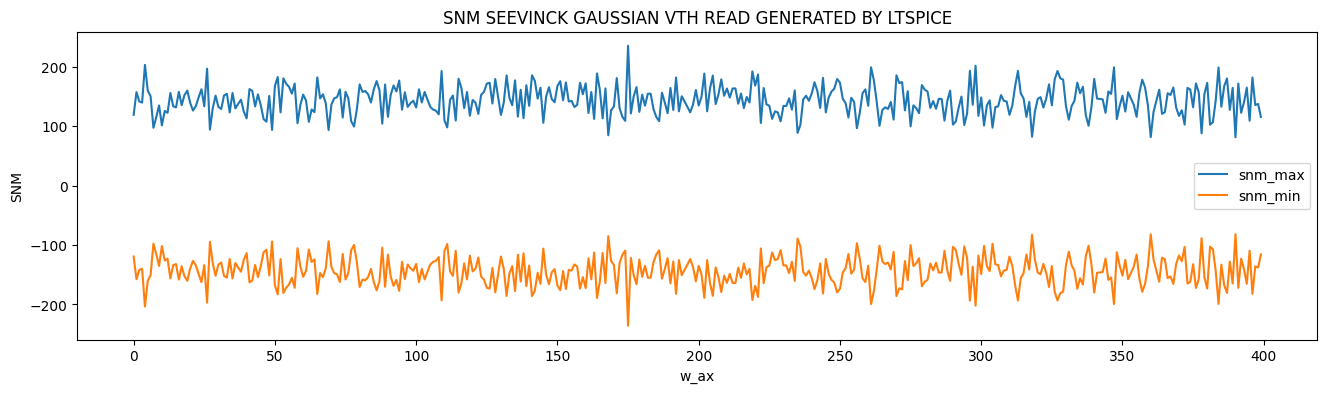

File updated successfully: ../../images/gaussian_vth_read_snm_ltspice.png


<Figure size 640x480 with 0 Axes>

In [16]:
gaussian_vth_read_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "gaussian-vth/read/gaussian_vth_read.asc"),
                                schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
                                )
vwl=vwl_read; vbl=vbl_read; vblneg=vblneg_read
gaussian_vth_read_netlist.set_parameter('l_ax', l_ax_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_ax', w_ax_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_pmos_q', l_pmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_pmos_q', w_pmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_nmos_q', l_nmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_nmos_q', w_nmos_q_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('vdd', vdd_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('vwl', vwl)
gaussian_vth_read_netlist.set_parameter('vbl', vbl)
gaussian_vth_read_netlist.set_parameter('vblneg', vblneg)
gaussian_vth_read_netlist.set_parameter('vsweep', vsweep_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e1', e1_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e2', e2_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e3', e3_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e4', e4_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e5', e5_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e6', e6_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e7', e7_gaussian_vth)
gaussian_vth_read_netlist.set_parameter('e8', e8_gaussian_vth)
gaussian_vth_read_netlist.add_instructions(
                                        rit_models_montecarlo,
                                        dc_vsweep_gaussian_vth,
                                        step_param_run_gaussian_vth,
                                        snm_max,
                                        snm_min
                                    )
gaussian_vth_read_runner = SimRunner(output_folder=f"{data}/gaussian-vth/read/")
gaussian_vth_read_runner.run(netlist=gaussian_vth_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(gaussian_vth_read_runner.okSim) + '/' + str(gaussian_vth_read_runner.runno))

gaussian_vth_read_raw = ""
gaussian_vth_read_log = ""
for gaussian_vth_read_raw, gaussian_vth_read_log in gaussian_vth_read_runner:
    print("Raw file: %s, Log file: %s" % (gaussian_vth_read_raw, gaussian_vth_read_log))

gaussian_vth_read_ltr = load_ltr(raw_file_path=gaussian_vth_read_raw)
v_1_gaussian_vth_read = gaussian_vth_read_ltr.get_trace("V(v1)")
v_2_gaussian_vth_read = gaussian_vth_read_ltr.get_trace("V(v2)")
vsweep_gaussian_vth_read = gaussian_vth_read_ltr.get_trace('vsweep')
steps = gaussian_vth_read_ltr.get_steps()

plt.figure(figsize=(8, 4))
vq_gaussian_vth_read = []
vqneg_gaussian_vth_read = []
vq_vqneg_gaussian_vth_read = []
x_gaussian_vth_read = []
for step in range(len(steps)):
    vq = v_1_gaussian_vth_read.get_wave(step)
    vqneg = v_2_gaussian_vth_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_gaussian_vth_read.append(vq)
    vqneg_gaussian_vth_read.append(vqneg)
    vq_vqneg_gaussian_vth_read.append(vq_minus_vqneg)
    x = vsweep_gaussian_vth_read.get_wave(step)
    x_gaussian_vth_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
gaussian_vth_read_simulation_path_image = os.path.join(images, "gaussian_vth_read_simulation.png")
check_output_image(gaussian_vth_read_simulation_path_image)
plt.savefig(gaussian_vth_read_simulation_path_image)
plt.show()


gaussian_vth_read_log_file_path = f"./{gaussian_vth_read_log}"
with open(gaussian_vth_read_log_file_path, "r") as file:
    content = file.read()

snm_max_gaussian_vth_read_data = re.search(snm_max_seevinck_pattern, content, re.DOTALL).group(1)
snm_max_gaussian_vth_read_lines = snm_max_gaussian_vth_read_data.strip().split('\n')[1:]
snm_max_gaussian_vth_read = [float(line.split('\t')[1]) * 1000 for line in snm_max_gaussian_vth_read_lines]
# snm_max_gaussian_vth_read = [1000 * snm_max for snm_max in snm_max_gaussian_vth_read]

snm_min_gaussian_vth_read_data = re.search(snm_min_seevinck_pattern, content, re.DOTALL).group(1)
snm_min_gaussian_vth_read_lines = snm_min_gaussian_vth_read_data.strip().split('\n')[1:]
snm_min_gaussian_vth_read = [float(line.split('\t')[1]) * 1000 for line in snm_min_gaussian_vth_read_lines]
# snm_min_gaussian_vth_read = [1000 * snm_min for snm_min in snm_min_gaussian_vth_read]

print("{:<30} {:<30} {:<30}".format("V_TH", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_gaussian_vth_read = []
v_th_read_gaussian_vth = []
for smax, smin in zip(snm_max_gaussian_vth_read, snm_min_gaussian_vth_read):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{ValueError} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_gaussian_vth_read.append(smean)

plt.figure(figsize=(16, 4))
plt.plot(snm_max_gaussian_vth_read)
plt.plot(snm_min_gaussian_vth_read)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min"])
plt.title("SNM SEEVINCK GAUSSIAN VTH READ GENERATED BY LTSPICE")
plt.show()
gaussian_vth_read_snm_ltspice_path_image = os.path.join(images, "gaussian_vth_read_snm_ltspice.png")
check_output_image(gaussian_vth_read_snm_ltspice_path_image)
plt.savefig(gaussian_vth_read_snm_ltspice_path_image)
plt.show()

snm_mean_gaussian_vth_read = 143.8688995
snm_stdev_gaussian_vth_read = 24.802555578987654
File updated successfully: ../../images/gaussian_vth_snm_read.png


<Figure size 1600x400 with 0 Axes>

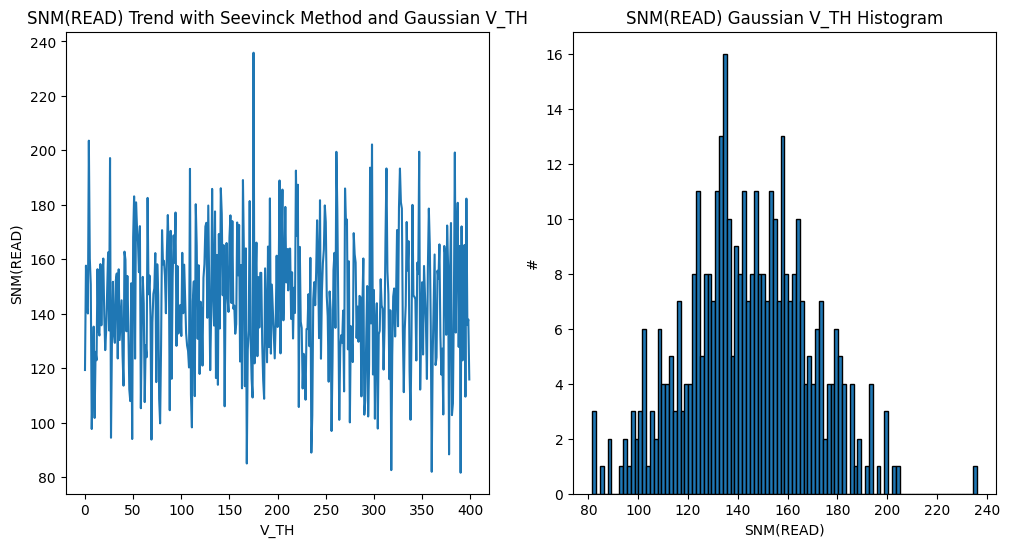

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(16, 4))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(snm_max_gaussian_vth_read)  
# axs[0].plot(w_ax_read_seevinck, snm_read_seevinck)
axs[0].set_title("SNM(READ) Trend with Seevinck Method and Gaussian V_TH")
axs[0].set_xlabel("V_TH"); axs[0].set_ylabel("SNM(READ)")
axs[1].hist(snm_max_gaussian_vth_read, bins=100, edgecolor='black')
axs[1].set_xlabel("SNM(READ)"); axs[1].set_ylabel("#") 
axs[1].set_title("SNM(READ) Gaussian V_TH Histogram")
print(f'snm_mean_gaussian_vth_read = {mean(snm_max_gaussian_vth_read)}')
print(f'snm_stdev_gaussian_vth_read = {stdev(snm_max_gaussian_vth_read)}')

gaussian_vth_snm_read_path_image = os.path.join(images, "gaussian_vth_snm_read.png")
check_output_image(gaussian_vth_snm_read_path_image)
plt.savefig(gaussian_vth_snm_read_path_image)
plt.show()
plt.tight_layout()

In [18]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# w_ax_pick_pos_gaussian_vth_read = 1
# vq_gaussian_vth_read = v1
# vqneg_gaussian_vth_read = v2
# vq_vqneg_gaussian_vth_read = vq_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read] - vqneg_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read]
# vq_vqneg_array = []
# for vq_array, vqneg_array in zip(vq_gaussian_vth_read, vqneg_gaussian_vth_read):
#     vq_vqneg_array = vq_array - vqneg_array
#     x_diff, y_diff = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], vq_vqneg_array, -45)
#     axs[0].plot(x_diff, y_diff, color='red')
# axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
# axs[0].legend(["V(v1) - V(v2)"])
# 
# 
# snm_gaussian_vth_read, x_snm_start, y_snm_start = seevinck_processing(x_v1_minus_v2=x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v1_minus_v2=vq_vqneg_gaussian_vth_read, ax=axs[1])
# snm_gaussian_vth_read = (1/sqrt(2)) * snm_gaussian_vth_read
# axs[1].text(x_snm_start + 0.05, y_snm_start + 0.05, 'SNM= %.3f mV' % snm_gaussian_vth_read, fontsize=14)
# axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
# print(f'snm_gaussian_vth_read = {snm_gaussian_vth_read}')
# 
# w_ax_pick_pos_gaussian_vth_read = 1
# x1, y1 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v1[w_ax_pick_pos_gaussian_vth_read], -45)
# x2, y2 = rotate_points(x_gaussian_vth_read[w_ax_pick_pos_gaussian_vth_read], v2[w_ax_pick_pos_gaussian_vth_read], -45)
# 
# axs[1].plot(x1, y1, color='blue')
# axs[1].plot(x2, y2, color='green')
# snm_gaussian_vth_read = standard_processing(x_vq=x1, vq=y1, x_vqneg=x2, vqneg=y2, ax=axs[1])
# 
# v1_minus_v2_gaussian_vth_read_path_image = os.path.join(images, "v1_minus_v2_gaussian_vth_read.png")
# check_output_image(v1_minus_v2_gaussian_vth_read_path_image)
# plt.savefig(v1_minus_v2_gaussian_vth_read_path_image)
# plt.show()